<a href="https://colab.research.google.com/github/sonu874/Forest-Fire-CNN-/blob/main/Forest_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as ts
import numpy as np
import pandas as pd
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [ ]:
path="/content/drive/MyDrive/forest_fire"

In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(path + "/Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                          
test_dataset = test.flow_from_directory(path + "/Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')



Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
r = model.fit(train_dataset,epochs = 10,validation_data = test_dataset)

Epoch 1/10
58/58 [==============================] - 445s 8s/step - loss: 0.3259 - accuracy: 0.8526 - val_loss: 0.4217 - val_accuracy: 0.8529
Epoch 2/10
58/58 [==============================] - 91s 2s/step - loss: 0.1817 - accuracy: 0.9400 - val_loss: 0.3162 - val_accuracy: 0.9265
Epoch 3/10
58/58 [==============================] - 93s 2s/step - loss: 0.1524 - accuracy: 0.9465 - val_loss: 0.2902 - val_accuracy: 0.9265
Epoch 4/10
58/58 [==============================] - 92s 2s/step - loss: 0.1053 - accuracy: 0.9640 - val_loss: 0.2731 - val_accuracy: 0.9118
Epoch 5/10
58/58 [==============================] - 91s 2s/step - loss: 0.1108 - accuracy: 0.9596 - val_loss: 0.3755 - val_accuracy: 0.8382
Epoch 6/10
58/58 [==============================] - 92s 2s/step - loss: 0.0820 - accuracy: 0.9705 - val_loss: 0.2260 - val_accuracy: 0.9118
Epoch 7/10
58/58 [==============================] - 91s 2s/step - loss: 0.0869 - accuracy: 0.9733 - val_loss: 0.1622 - val_accuracy: 0.9412
Epoch 8/10
58/58 [=

In [ ]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)


In [ ]:
predictions

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
print(len(predictions))

68


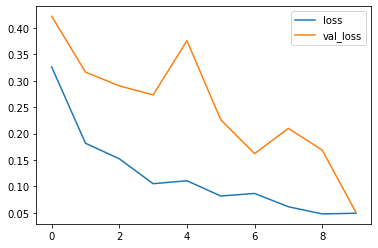

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

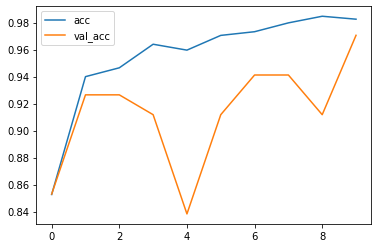

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

[[0.]]


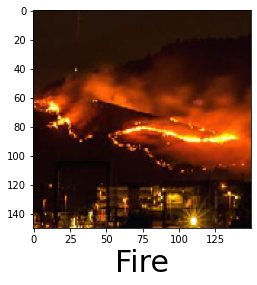

In [ ]:
predictImage(path+"/Testing/fire/abc182.jpg")

[[0.]]


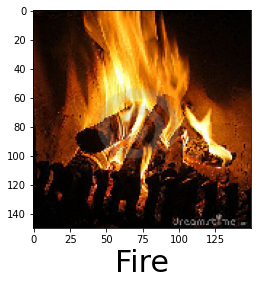

In [ ]:
predictImage("/content/drive/MyDrive/9c6f46d694b25385caa2833131daf8f9--winter-house-winter-warmers.jpg")

[[1.]]


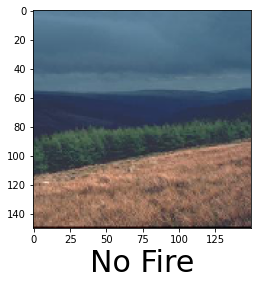

In [ ]:
predictImage(path+'/Testing/nofire/abc341.jpg')